In [1]:
from hendrics import read_events
%matplotlib notebook
import matplotlib.pyplot as plt

/opt/anaconda3/envs/testenv/lib/python3.10/site-packages/stingray/utils.py:25: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
/opt/anaconda3/envs/testenv/lib/python3.10/site-packages/stingray/utils.py:40: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")
/opt/anaconda3/envs/testenv/lib/python3.10/site-packages/hendrics/io.py:34: UserWarning: Warning! NetCDF is not available. Using pickle format.
  warnings.warn(msg)


In [2]:
import os
os.name

'posix'

In [3]:
outA = read_events.treat_event_file('sourceA.evt')

INFO: Opening sourceA.evt [hendrics.read_events]


/opt/anaconda3/envs/testenv/lib/python3.10/site-packages/stingray/io.py:235: UserWarning: Column energy not found
  warnings.warn('Column ' + a + ' not found')


INFO: Saving data and info to sourceA_nustar_fpma_ev.p [hendrics.io]


In [4]:
print(outA)

['sourceA_nustar_fpma_ev.p']


In [5]:
from hendrics import calibrate

In [6]:
calibrate.calibrate(outA[0], 'cal_'+outA[0], rmf_file='/Users/samsonmercier/Downloads/FPMA_sr.rmf')

INFO: Loading file sourceA_nustar_fpma_ev.p... [hendrics.calibrate]
INFO: Loading data and info from sourceA_nustar_fpma_ev.p [hendrics.io]
INFO: Done. [hendrics.calibrate]
INFO: Saving calibrated data to cal_sourceA_nustar_fpma_ev.p [hendrics.calibrate]
INFO: Saving data and info to cal_sourceA_nustar_fpma_ev.p [hendrics.io]


In [7]:
import hendrics.base
import hendrics.io


In [8]:
55073.18504000-0.25*2.0869953

55072.663291175

Edit the File `orbit_t2.txt` to insert the right orbital solution

In [10]:
evA = hendrics.io.load_events('cal_'+outA[0],)
evA_deorbit == hendrics.base.deorbit_events(evA, parameter_file='orbit_t2.txt')
hendrics.io.save_events(evA_deorbit, "deorbit_cal_" + outA[0])

INFO: Loading data and info from cal_sourceA_nustar_fpma_ev.p [hendrics.io]


2022-10-07 09:29:33.877 | DEBUG    | pint.toa:__init__:1310 - No pulse number flags found in the TOAs
2022-10-07 09:29:33.877 | DEBUG    | pint.toa:compute_TDBs:2139 - Computing TDB columns.
2022-10-07 09:29:33.878 | DEBUG    | pint.toa:compute_TDBs:2164 - Using EPHEM = de200 for TDB calculation.
2022-10-07 09:29:33.923 | DEBUG    | pint.toa:compute_posvels:2255 - Computing PosVels of observatories and Earth, using de200
2022-10-07 09:29:33.928 | DEBUG    | pint.toa:compute_posvels:2310 - SSB obs pos [0. 0. 0.] m


INFO: Interpolating orbital solution with 645 points [hendrics.base]
INFO: Using default ephemeris: de200 [hendrics.base]


2022-10-07 09:29:55.707 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:54 - Set solar system ephemeris to de200 from download
2022-10-07 09:29:55.732 | DEBUG    | pint.toa:compute_posvels:2324 - Adding columns ssb_obs_pos ssb_obs_vel obs_sun_pos
2022-10-07 09:29:55.758 | DEBUG    | pint.models.solar_system_shapiro:solar_system_shapiro_delay:102 - Skipping Shapiro delay for Barycentric TOAs


INFO: Saving data and info to deorbit_cal_sourceA_nustar_fpma_ev.p [hendrics.io]


In [11]:
import hendrics.efsearch
import numpy as np

frequencies, stats, step, length = hendrics.efsearch.folding_search(evA, 0.208, 0.209, oversample=2)

INFO: Searching 78 frequencies [hendrics.efsearch]


In [12]:
print(frequencies[np.argmax(stats)])

0.20847747614361542


<IPython.core.display.Javascript object>


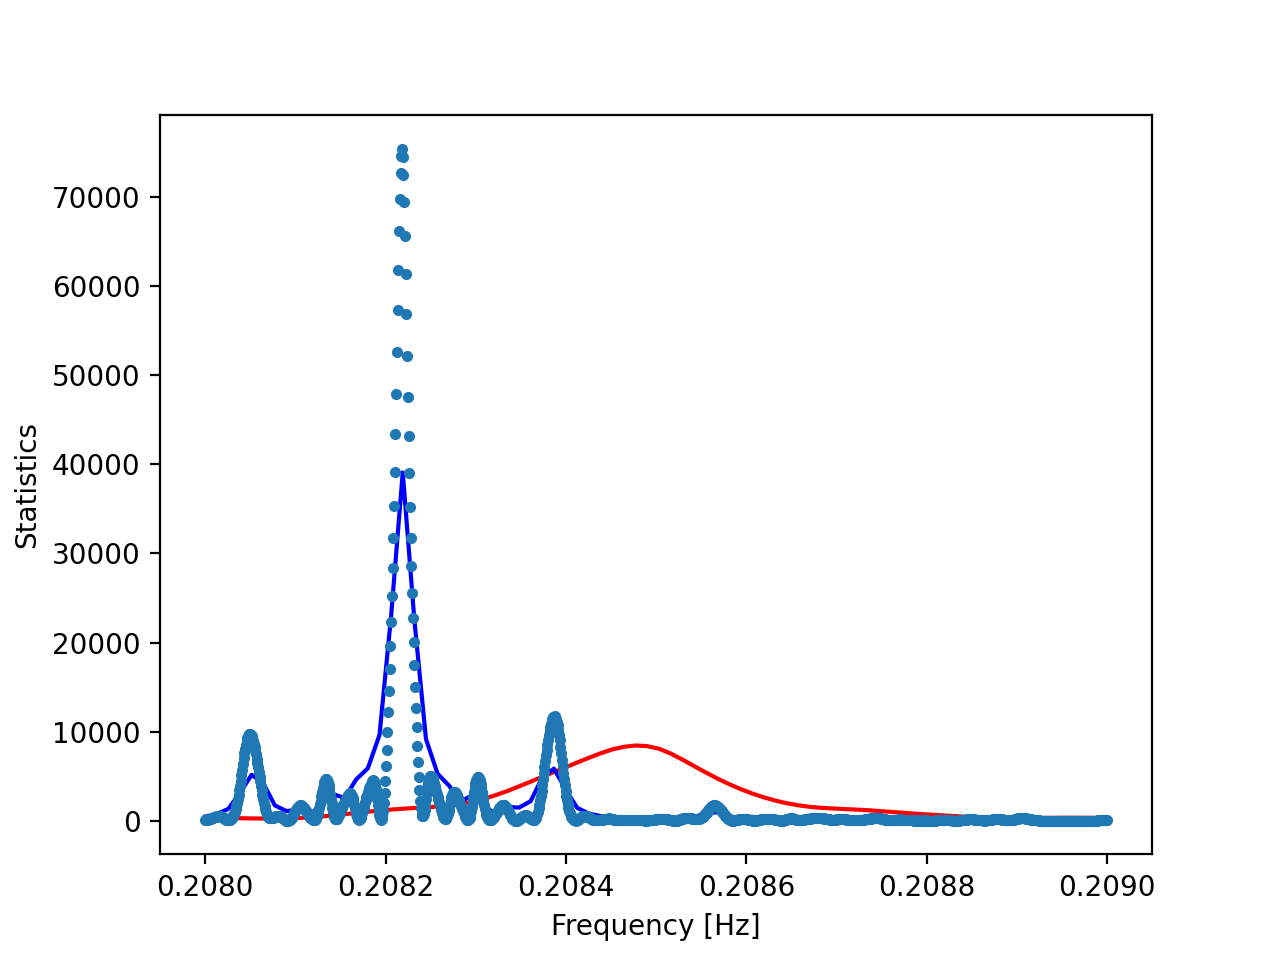

Text(0, 0.5, 'Statistics')

In [13]:
plt.figure()
plt.plot(frequencies, stats, color='red', label='No orbit')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Statistics')

In [14]:
frequencies, stats, step, length = hendrics.efsearch.folding_search(evA_deorbit, 0.208,0.209, oversample=2,
                                                                    segment_size=30000)
plt.plot(frequencies, stats, color='blue', label='Orbit')
print(frequencies[np.argmax(stats)])


INFO: Searching 78 frequencies [hendrics.efsearch]
0.2082191171777371


In [15]:
fr, dfr, chisq = np.loadtxt('ef_periodogram_f.qdp', skiprows=5, comments=['!', 'l'], unpack=True)

In [16]:
plt.plot(fr,chisq, marker='.', linestyle='', label='Orbit (CF)')
print(fr[np.argmax(chisq)])


0.2082183115962


In [53]:
plt.legend()

See https://hendrics.stingray.science/en/stable/tutorials/pulsars.html for pulsation search